## Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.average(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices, ddof=1)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can be phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>**RM vs MEDV (<i>increases</i>) : ** Intuitively we can say that RM and MEDV are strongly correlated. Hihger the number of rooms, higher the costs in any given neighborhood. This observation is independent for any given neighborhood. **MEDV increases with increasing RM**.</li>
<li>**LSTAT vs MEDV (<i>decreases</i>) : ** Again these two variables are strongly correlated. High number of lower class workers would want to move into neighborhoods where they can buy affordable homes according to their income.That directly implies a decrese in or a low value MEDV. **MEDV decreases with increasing LSTAT.**</li>
<li>**PTRATIO vs MEDV (<i>decreases</i>) : ** A higher or lower PTRATIO can be an indicator of number of available quality schools in the neighborhood. Most of the house owners would want to buy houses in neighborhood with good quality education for their children. A higher PTRATIO will imply that number of teachers is very low in the neighborhood. So house price will not be much. **MEDV decreases with increasing PTRATIO.**</li>
</ol>

By increase in MEDV its just meant that most of the midvalues within the given data range either increase or decrease with respect to a given feature.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

<p style="color:#00f"><b>Answer: </b></p>
**1.** Yes.<br />
**2.** Because 92.3% of variance is a high value showing that 92.3% of variance in <i>true value</i> is predictable from <i>prediction values</i>. <br />A high R^2 score implies a successful capture of the variation of the given target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import 'train_test_split'
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
import random

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split( features, 
prices, test_size=0.2, random_state=np.random.randint(1, 100))

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

<p style="color:#00f"><b>Answer: </b></p>
Some of the benefits of splitting data into training and testing subsets for a learning algorithm/model are:<br />
<ul>
<li>It helps us to assess the accuracy, reliability and credibility of the model. These <br />metrics cannot be overlooked for predictive models. </li>
<li>Training subset is used to derive the predictive model.</li>
<li>In contrast testing subset is useful in evaluating the performance of the model.</li>
<li>The most important benefit is that by chosing an optimal training/testing ratio, 
<br />the model will have fine tuned fit. In other words the model will neither be underfit or overfit</li>
</ul>

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

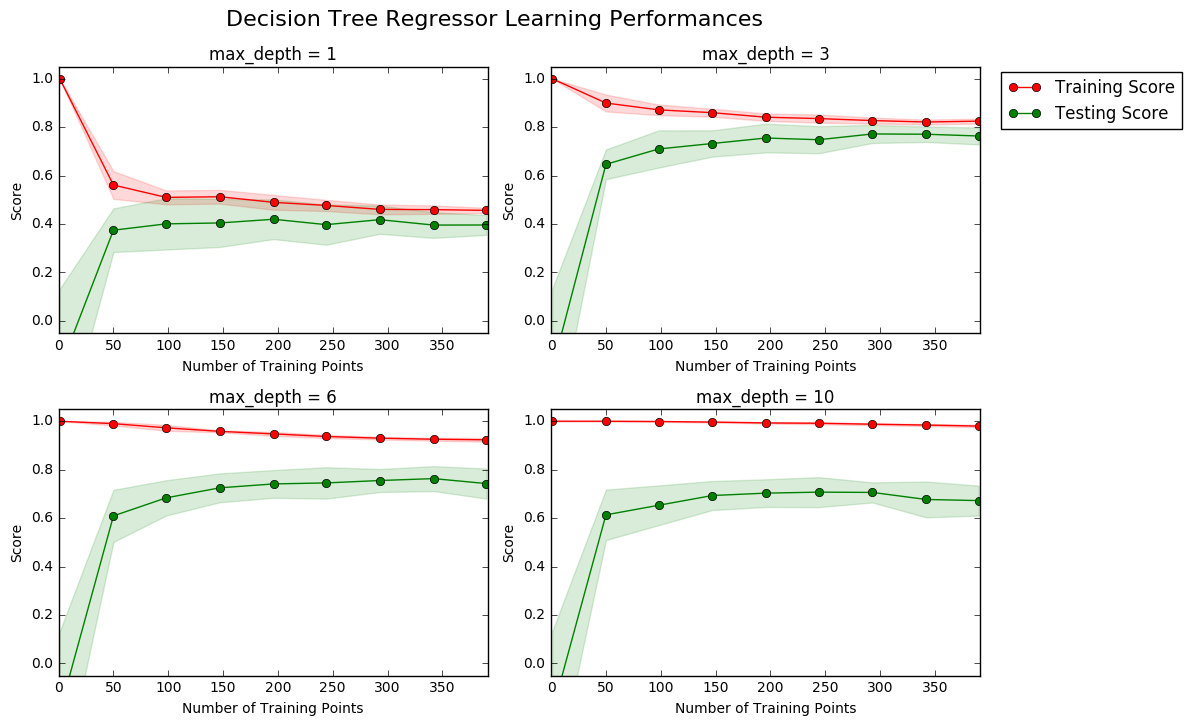

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>I have chosen the graph with maximum depth of 3 in order to answer the rest of the questions.</li>
<li>Approximately starting from 10 to 50 training points the score of the learning curve has a linear<br /> growth.
Starting from 50 to 250 the score again increases though not linearly but in small increments.<br /> From 250 onwards the scores tend to remain almost same with small variations. On the other hand <br />testing curve scores keep decreasing again with small increments as more testing points are added.</li>
<li>In all 4 graphs we can see that the score almost tends to fluctuate around the same values with<br /> small increments or decrements. Chosing a training set that has atleast 50 data points is <br />recommended. But anything beyond 50 data points is not going to have a significant influence <br />on the model, since the score tends to converge towards a stable value.</li>
</ol>

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

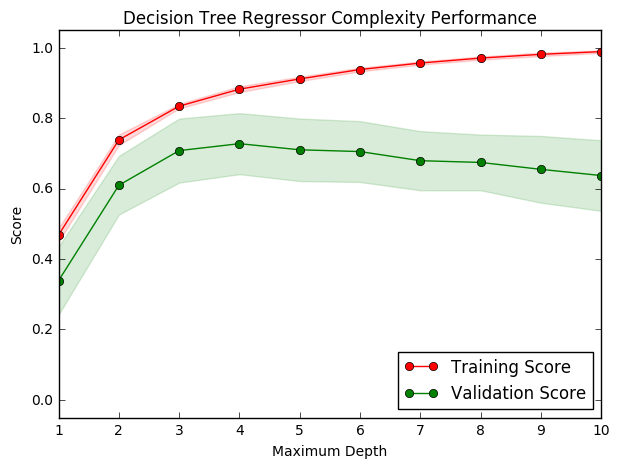

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>At maximum depth of 1 the model suffers from high bias (model is underfitting).</li>
<li>At maximum depth of 10 the model suffers from high variance (model is overfitting).</li>
</ol><br />
**Visual cues : ** Our first and obvious visual indicator is the score. At maximum depth of 1, score is approximately between 0.4 and 0.5 indicating an underfit. As the maximum depth increases the uncertainity denoted by the shaded curve keeps increasing for training score and decreases for validation score. Also training score decreases as maximum depth increases implying a high variance.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>My best guess is either 2, 3 or 4. If we want high score for both training and validation then 4 is a good choice. But if I have to go by Occams Razor I would either pick 2 or 3. My final choice would be 3.</li>
<li>When looking for optimal model we should look for which score on the curve both validation and training curves converge.</li>
</ol>

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>Grid search is the technique of performing an exhaustive search on all possible subsets of parameter space of a learning model. The goal of grid search technique is to find an optimal subset of parameter values in order to minimize the validation error of a given learning model. The grid is made up of a subset of pairs of parameter values that give a minimum value of validation error function. The best example is directly from sci-kit learn documentation: <br />
<b>parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}</b>. In this example we are applying grid search on kernel parameters with possible values being 1 and 10. That is we are trying to find best combination of values for 'linear' and 'rbf' to obtain best performance tuning.
</li>
<li>In order to optimize a learning algorithm all possibe combinations of the parameter space are used to train a support vector machine (SVM). Finally cross validation is used to asses the performance and fit the classifier with best parameter values.</li>
</ol>

## Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>Let's say we have dataset of size n. <b>K-fold cross validation training is the technique of dividing our n data sets into into k equal sized folds with each fold containing n/k datapoints.</b> We run k learning experiments using the k folds. In each experiment one of the folds is chosen as a validation set and rest k - 1 folds are used for traning. Since we run it k times, we make sure that all the data is used for training as well as testing. Hence our learning algorithm will be more accurate after applying k-fold cross validation by taking the best average test result from the k experiements. <b>However if our data is sorted then the split will happen sequentially unless we randomize our data, for example by settting shuffle="True". If the split happens sequentially the learning model will have a very low accuracy.</b></li>
<li><b>Grid search takes a given data set and splits it into training and validation sets.</b>In grid search there is no shuffling of data by default. Hence we can directly use k-fold cross validation scheme as a method parameter to perform optimal model selection using Grid Search. This way we will make sure that grid search uses randomized data and finds best parameters which fine tune the learning model. <i style="color:#d00">Lets say we use default GridSearchCV from sci-kit learn library which uses 3 fold cross-validation.</i> The problem with default fold value is we might end up with a learning model with a not so good accuracy and sometimes it might be worse depending upon our dataset.<b style="color:#00d">This is where k-fold cross validation comes into picture. Simply put we obtain an optimal learning model by using KFold validation in our grid search.</b></li>
</ol>

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [10]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params =  {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snippet above.

<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>The output of the previous code clearly indicates <b>maximum depth of 4</b> for the **optimal model**. I got it so right on the first shot in section 6. Then Occam's Razor principle made me finally pick 3. I should have paid close attention to the visuals. Yeha I am getting good at ML now :). So close.</li>
</ol>

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $415,800.00
Predicted selling price for Client 2's home: $236,478.26
Predicted selling price for Client 3's home: $888,720.00


<p style="color:#00f"><b>Answer: </b></p>
<ol>
<li>As per the predictions of our ML model I would recommend following prices to my clients:
    
        <ul><li>Client 1 : $415,800.00</li>
        
        <li>Client 2 : $236,478.26</li>
        
        <li>Client 3 : $888,720.00</li></ul>
       
</li>
<li>Yes the prices are highly reasonable for the given features.</li>
</ol>

<b>Justification for answer 2</b> &nbsp;(drawn from <i>Data Exploration</i> section) : 
<ol>
<li>We see that all prices recommended to the clients fall within minimum and maximum range of our data set.</li>
<li>According to feature observation higher the RM, lower the LSTAT and PTRATIO, higher is the price of the house.</li>
<li>The median price is $438,900.00. Hence first client who has a moderate home has a price very close to the median value. <br />Client 2 and 3 are nearer to the extreme ends of the spectrum,
client 2 on the lower end and 3 on the higher end respectively <br /> as is expected.</li>
</ol>

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)
performance_metric(y_train, reg.predict(X_train))

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


0.86897281255524328

### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

<p style="color:#00f"><b>Answer: </b></p>
<span style="color:#f00">Should we use the constructed model in the real world?</span>
<br /><b>No</b>. First reason being the fact that the difference between high and low of the ten trials is quite high for both low income workers and those belonging to middle class. Persons belonging to high-income scale may not pay that much attention i.e. generally speaking. When it comes to financially astute people I would not recommend to use our constructed predictive model.

On other hand considering MEDV has been scaled to account for 35 years of market inflation, its ok to use our learning model to get an approximate price. That is just to get an idea. Then the real estate agent can use his/her market experience to decide a reasonable price for the house. The Man-Machine (Kraftwerk rules :)).
Second reason is obvious: our data is underfitting. There are <a style="tex-decoration:none" href="http://worldpopulationreview.com/us-cities/boston-population/">278,521</a> housing units out of which 87,958 are owner occupied as per the census in the provided URL (Refrences: 8). Our data set represents only 489 neighbourhoods that to the prices of which are collected from 1978. So questions we have to pose is, <span style="color:#F00">how much change these neighbourhoods have undergone since 1978? Do all 489 datapoints fit the number of homes as per the latest census? Any other veracities in the provided data?</span>

<i style="color:#00F">If there has been no significant change in the neighbourhoods since 1978 (which is very doubtful) and 489 data points approximately include all homes according to the latest census (again dubious assumption), then yes its a good idea to use our model.</i>

<ol>
<li>If I had to make a prediction today then I would not use our constructed model and consider it outdated. In 4 decades the data will have changed significantly. Yes both inflation and deflation have an impact on the data. <a style="text-decoration:none" href="http://www.investopedia.com/ask/answers/correlation-inflation-houses.asp">Investopedia</a> states that that there is a correlation between inflation and house prices.</li>
<li><b>No.</b> Though I would consider RM or number of rooms as one of the main features, we have seen how other two features namely LSTAT and PTRATIO impact price of a house. Similarly there are other features as mentioned in the question itself which have a direct impact on the cost of the home. Other factors which spring up in my mind are quality of material used, design of the home, ambience, whether the house is a smart house or not, and how far is the home from the Boston city and other main areas within Boston. </li>
<li><b>No.</b> The reason being the model is underfitting and <b>highly sensitive</b> for a given set of features and prices.Our training model has a performance metric of 0.88 which is quite high. As far as houses of 1978 to 2013 are concerned (MEDV has been scaled to account for 35 years of market inflation) we can say that the model may show some consistency and perform robustly to a limited extent.</li>
<li>This is a straight forward **No** answer.</li>
<li>Most of the times <b>but not always fair.</b></li>
</ol>
<br /><b>Conclusion :</b>
Generally speaking I will not rely entirely upon our model. However I would use it to get an approximate idea about the
price. Then use my knowledge of existing conditions in the real estate market and my experience as a real estate agent( if I was one) to come up with a reasonable price for the home. 


 <h2 style="text-align: center">**Refrences**</h2>
<ol>
<li><a style="text-decoration:none; color:#09f;" href="http://scikit-learn.org/0.16/modules/classes.html">Sci-kit learn</a> documentation.</li>
<li><a style="text-decoration:none; color:#90f" href="http://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test">Salford systems</a> for info on train-test split.</li>
<li><a style="text-decoration:none; color:#09f" href="http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html">Amazon docs</a> to understand underfitting and overfitting.</li>
<li><a style="text-decoration:none; color:#90f" href=" https://medium.com/towards-data-science/train-test-split-and-cross-validation-in-python-80b61beca4b6">Medium dot com</a> for gaining insight into relationship between model fitting and cross validation.</li>
<li><a style="text-decoration:none; color:#09f" href="https://machinelearningmastery.com/much-training-data-required-machine-learning/">Machinelearningmastery dot come</a> page on how much training data is required for ML.</li>
<li><a style="text-decoration:none; color:#90f" href="https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)#Grid_search
">Wikipedia GridSearch</a> page to understand how grid search works.</li>
<li><a style="text-decoration:none; color:#09f" href="https://www.quora.com/Machine-Learning-How-does-grid-search-work">Quora</a> page on grid search question for more details.</li>
<li><a style="text-decoration:none; color:#90f" href="http://worldpopulationreview.com/us-cities/boston-population/">Worldpopulationreview</a> page on Boston demographics to obtain housing information.</li>
</ol>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.